# CMSE 802 Pre-class assignment: Machine Learning Part 2
## Date: 11/02/2018
## Due: 11/05/2018; 10:30 PM

### The goal of this assignment is to introduce some basics of Principal Component Analysis (PCA).

---
### Your name: Boyao Zhu

---
### 1. Review of Python Modules
Run the following cell to load the modules we used in class.

In [1]:
%matplotlib inline
# First things first. Let's import some of the modules we'll use

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

import sklearn
import sklearn.decomposition as dec
import sklearn.datasets as ds


**Question 1**: Identify the 4 modules we've imported, and their function. (the first one is free)

**Your answers: **

1. **numpy** (imported as np): A platform for numerical and scientific computing in Python. It provides multi-dimensional arrays (e.g., those from linear algebra) and tools for working with them.

2. ... matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy
3. ...SciPy builds on the NumPy array object and is part of the NumPy stack which includes tools like Matplotlib, pandas and SymPy, and an expanding set of scientific computing libraries. 
4. ... sklearn is a free software machine learning library for the Python programming language.[3] It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

---

### 2. Intuition about principal component analysis

The following videos (Developed at Georgia Tech) are to help you gain an understanding and intuition about principal component analysis (PCA). PCA is one of main techniques used in data science, exploratory data analysis and modeling.

You can watch the entire course here:

https://youtu.be/Ki2iHgKxRBo?list=PLAwxTw4SYaPl0N6-e1GvyLp5-MUMUjOKo

It's really good but we don't have time to cover it all. 

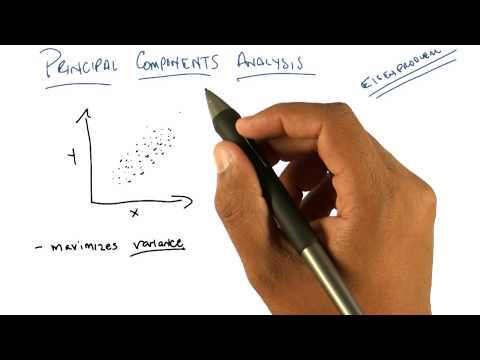

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("kw9R0nD69OU",width=640,height=360)

**Question 2**: PCA is trying to find the directions with maximal _variance _ _ _ _?

**Your answer: **

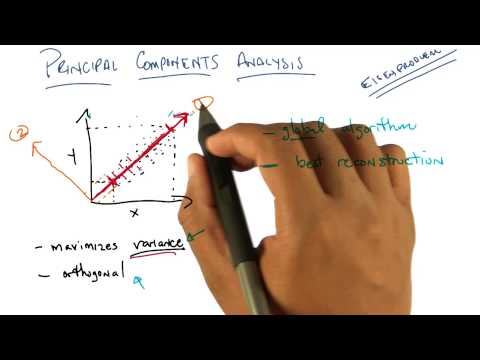

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("_nZUhV-qhZA",width=640,height=360)

**Question 3**: This video introduces a concept of "features" in a dataset. What are the names of the two original features represented in the graph shown in this video. 

**Your answer:  ** the first principle component and second principle component

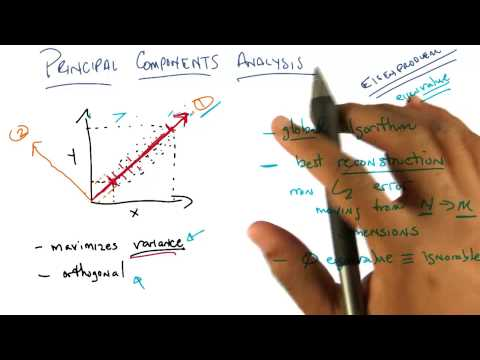

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("kuzJJgPBrqc",width=640,height=360)

**Question 4**: If the eigenvalue of a dimension is zero, what happens? 

**Your answer: ** It provide no information

---
The video linked below is also a good one for getting some ideas of PCA. You are recommended to take a look of it.

https://www.youtube.com/watch?v=_UVHneBUBW0

---
### 3. PCA hands-on experience.
Here, let's do some hands-on PCA practices.  We will break down the process into several small steps.

---
**A. ** We have a data set containing 10 data points. Let's plot those data points and take a look.

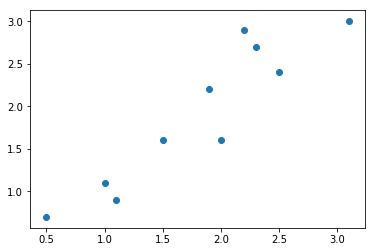

In [6]:
# data point
x = np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1])
y = np.array([2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9])

# plot the data points
# your code:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

---
**B. ** Calculate the mean of x and mean of y. 

In [7]:
# Your code:
import numpy as np
mean_x = np.mean(x)
mean_y = np.mean(y)

print (mean_x)
print (mean_y)


1.81
1.9100000000000001


---
**C. ** Now, we need to calculate the covariance matrix of the data set: 

$$ CovM = \left[ \begin{array}{cc} cov(X,X) & cov(X,Y) \\ cov(Y,X) & cov(Y,Y) \end{array} \right],$$

where the covariance between two sets of values can be obtained using the formula below. For example, $cov(X,Y)$ is 

$$ cov(X,Y) = \frac{\sum_{i=1}^n (X_i-\bar{X}) (Y_i - \bar{Y})}{n-1}  ,$$

where $n$ is the number of values in the set, and the overhead bar indicates the mean value.

** Calculate the covariance matrix in the cell below. **

In [13]:
# Your code:
cov_xx = 0
for i in range(10):
    cov_xx += (x[i]-mean_x)**2
cov_xx = cov_xx / 9

cov_yy = 0
for i in range(10):
    cov_yy += (y[i]-mean_y)**2
cov_yy = cov_yy / 9

cov_xy = 0
for i in range(10):
    cov_xy += (x[i]-mean_x)*(y[i]-mean_y)
cov_xy = cov_xy / 9

covM = np.zeros((2,2))
covM[0,0]=cov_xx
covM[0,1]=cov_xy
covM[1,0]=covM[0,1]
covM[1,1]=cov_yy

print (covM)

##################################

M = np.stack((x,y))
covM2 = np.cov(M)
print (covM2)

[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]
[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


---
**D. ** Calculate the eigenvalues and eigenvectors of the covariance matrix. You can use existing function to do this. Or, if you want to write your code to calculate the eigenvalues and eigenvectore, it will be great. 

In [15]:
# Your code:
from numpy import linalg as LA

eigval, eigvec = LA.eig(covM)

print (eigval)
print (eigvec)

[0.0490834  1.28402771]
[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


---
**E. ** Transfer the original data using the two eigenvectors.  

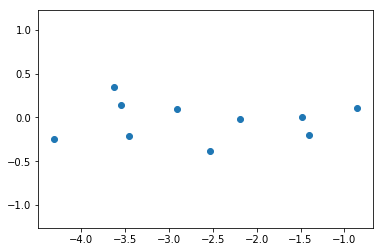

In [52]:
# Your code:

nA = np.zeros((2,len(x)))
nA[0,:] = x
nA[1,:] = y

# eigenvector 1
ev1 = np.zeros(2)
ev1[0] = eigvec[0,1]    # <== fill the blank
ev1[1] = eigvec[1,1]      # <== fill the blank

# eigenvector 2
ev2 = np.zeros(2)
ev2[0] = eigvec[0,0]       # <== fill the blank
ev2[1] = eigvec[1,0]     # <== fill the blank


# obtain the data in the new coordinate from PCA
n_x = np.matmul(ev1,nA)
n_y = np.matmul(ev2,nA)

# plot the result
plt.scatter(n_x,n_y)
plt.axis('equal')
plt.show()

---
### 4. Using PCA function from sklearn library
Since PCA is a common practice in data science, there must exist available PCA functions. Investigate decomposition.PCA( ), pca.fit( ), and pca.transform( ) functions in the sklearn lirbary. Use those functions to do the work in Section 3.

[[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]


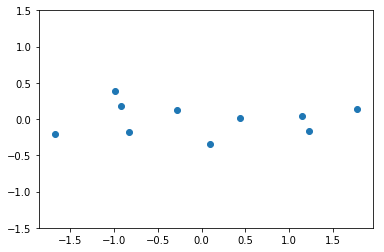

In [61]:
# Your code:
M = np.stack((x,y), axis=1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#M = StandardScaler().fit_transform(M)
pca = PCA(n_components = 2)
pca.fit(M)
a = pca.transform(M)
#a = pca.fit_transform(M)

plt.scatter(a[:,0], a[:,1])
#plt.xlim([-5,0])
plt.ylim([-1.5,1.5])
print (pca.components_)


### Congratulations, you're done with your pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course Desire2Learn web page.  Go to Assessments > Assignments, find the link for Pre-class assignment 20181105, and upload it there.

**Please keep a copy the code. We will reuse the code in the class.**

See you in class!